<h1></h1>

<center>
    <h1>
        <b>Análisis e interpretación de datos</b>
    </h1>
</center>
<center>
    <h2>
        Definición de un problema estadístico: modelización y propuesta de soluciones
    </h2>
</center>
<center>
    <h3>
        <div class="alert alert-block alert-warning">
            Actividad Grupal      
        </div>
    </h3>
</center>

David Alejandro Cubides Maldonado <br>
Emanuel Gaviria Vargas <br>
Sofia Neiva Monsalve <br>
Yuli Natalia Suárez Rodriguez  <br>
<b> Enero - 2024</b>

## Importar librerias necesarias

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm

## Cargar el conjunto de datos
Para el planteamiento del problema estadístico se hace uso de un conjunto de datos del gobierno en Colombia acerca de la tasa de interés.
El conjunto de datos se obtuvo del siguiente enlace:
<br> https://www.datos.gov.co/Econom-a-y-Finanzas/Tasas-de-inter-s-de-vivienda/kett-344shttps://www.datos.gov.co/Econom-a-y-Finanzas/Tasas-de-inter-s-de-vivienda/kett-344s </br>


In [12]:
#Cargue del conjunto de datos
ruta = "https://raw.githubusercontent.com/YNSuarez/DataSetsUNIR/main/Tasa_interes_vivienda_limpio_4.csv"
data = pd.read_csv(ruta)

## Inspeccionar el conjunto de datos
Se proporciona una visión completa de las dimensiones del dataset, la información sobre los tipos de datos y la presencia de valores nulos, así como la variabilidad en los valores de cada columna.

### Dimensionamiento del dataset

In [13]:
# Tamaño del dataset
print("Cantidad de filas y columnas del conjunto de datos:", data.shape)

# Obtener las primeras y últimas filas
first = data.head(3)
last = data.tail(3)

result = pd.concat([first, last])
result

Cantidad de filas y columnas del conjunto de datos: (46691, 6)


,Fecha,Tasa_efectiva_promedio_ponderada,Montos_desembolsados,Numero_de_creditos_desembolsados,Plazo,Valor_promedio_credito
0,45247,15.12,83953304.0,1,4,83953304.0
1,45212,8.80,36489064.0,1,5,36489064.0
2,45177,15.02,587105406.0,15,3,39140360.4
46688,45254,19.35,63000000.0,1,3,63000000.0
46689,45268,14.00,60400000.0,1,4,60400000.0
46690,45282,8.10,75000000.0,1,5,75000000.0


### Información básica del dataset

In [14]:
# Mostrar información sobre las columnas, tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46691 entries, 0 to 46690
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fecha                             46691 non-null  int64  
 1   Tasa_efectiva_promedio_ponderada  46691 non-null  float64
 2   Montos_desembolsados              46691 non-null  float64
 3   Numero_de_creditos_desembolsados  46691 non-null  int64  
 4   Plazo                             46691 non-null  int64  
 5   Valor_promedio_credito            46691 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 2.1 MB


In [15]:
#Mostrar conteo de valores unicos por columna
data.nunique()

Fecha                                  52
Tasa_efectiva_promedio_ponderada     1729
Montos_desembolsados                26037
Numero_de_creditos_desembolsados      198
Plazo                                   5
Valor_promedio_credito              26197
dtype: int64

### Resumen estadístico básico de los atributos:

In [16]:
# Mostrar estadísticos redondeados de las columnas
data.describe().round(2)

,Fecha,Tasa_efectiva_promedio_ponderada,Montos_desembolsados,Numero_de_creditos_desembolsados,Plazo,Valor_promedio_credito
count,46691.00,46691.00,4.669100e+04,46691.00,46691.00,4.669100e+04
mean,45213.38,15.30,4.008231e+08,3.60,3.75,1.247191e+08
std,82.03,4.14,1.361540e+09,15.36,0.94,1.248416e+08
min,44939.00,2.91,1.000000e+05,1.00,1.00,1.000000e+05
25%,45198.00,14.00,7.000000e+07,1.00,3.00,5.928301e+07
50%,45233.00,16.50,1.200000e+08,1.00,4.00,9.218167e+07
75%,45268.00,18.02,2.500000e+08,2.00,4.00,1.494022e+08
max,45296.00,25.71,6.383443e+10,1022.00,5.00,4.700000e+09


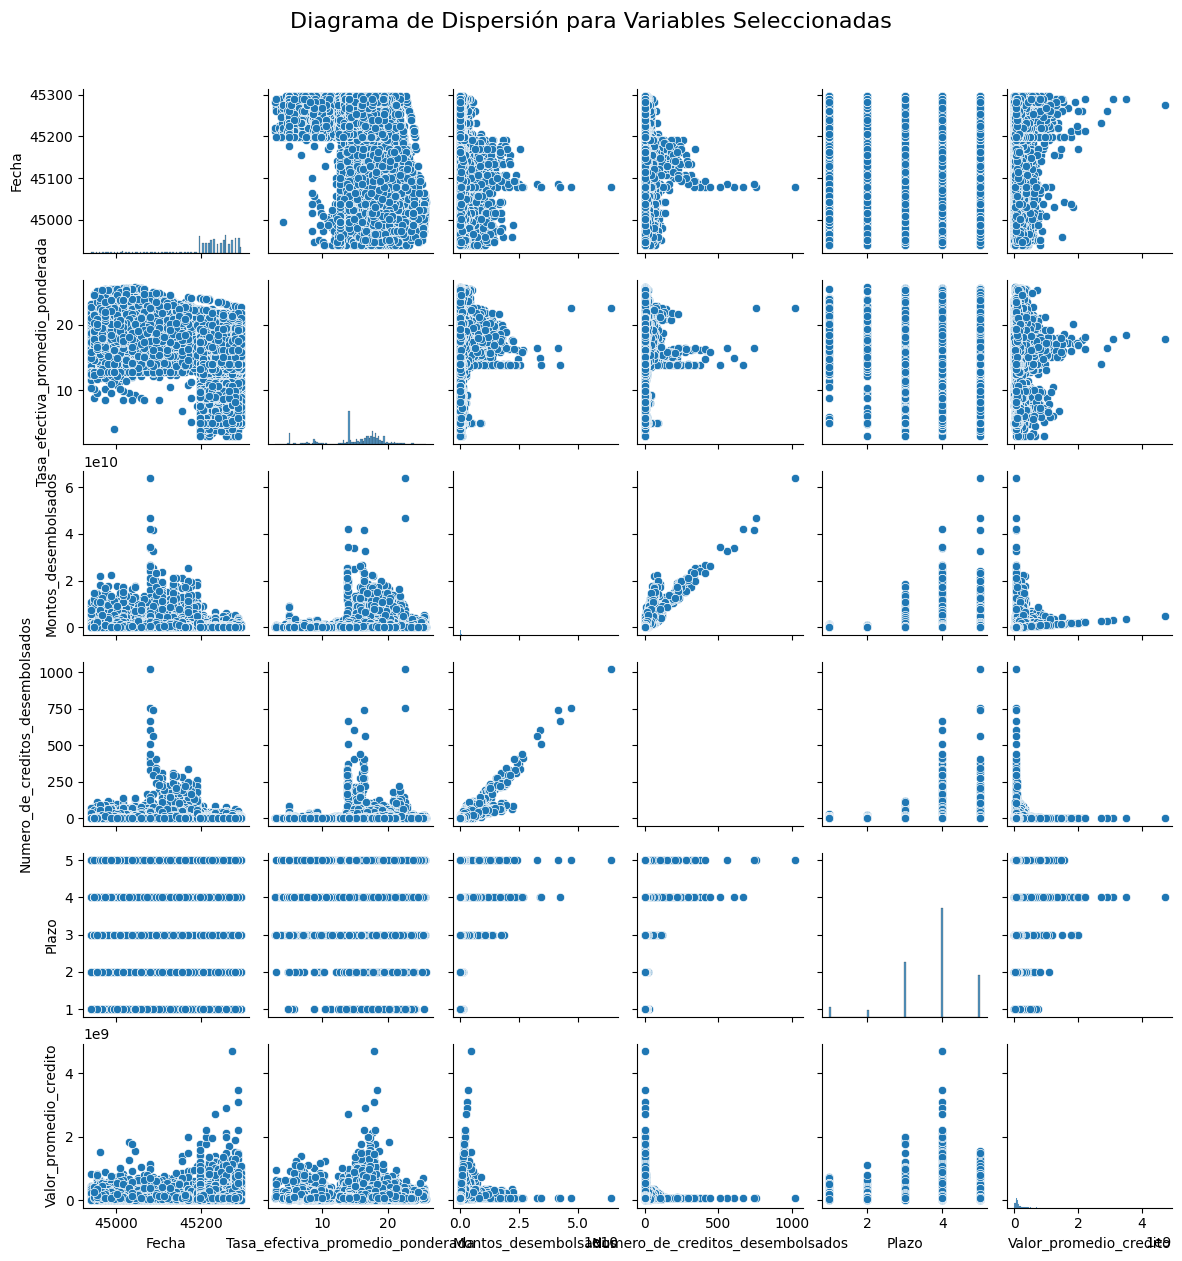

In [17]:
# Crear diagramas de dispersión de los datos en general
sns.pairplot(data,
             height=2)
plt.suptitle('Diagrama de Dispersión para Variables Seleccionadas', size=16, y=1.05)
plt.show()

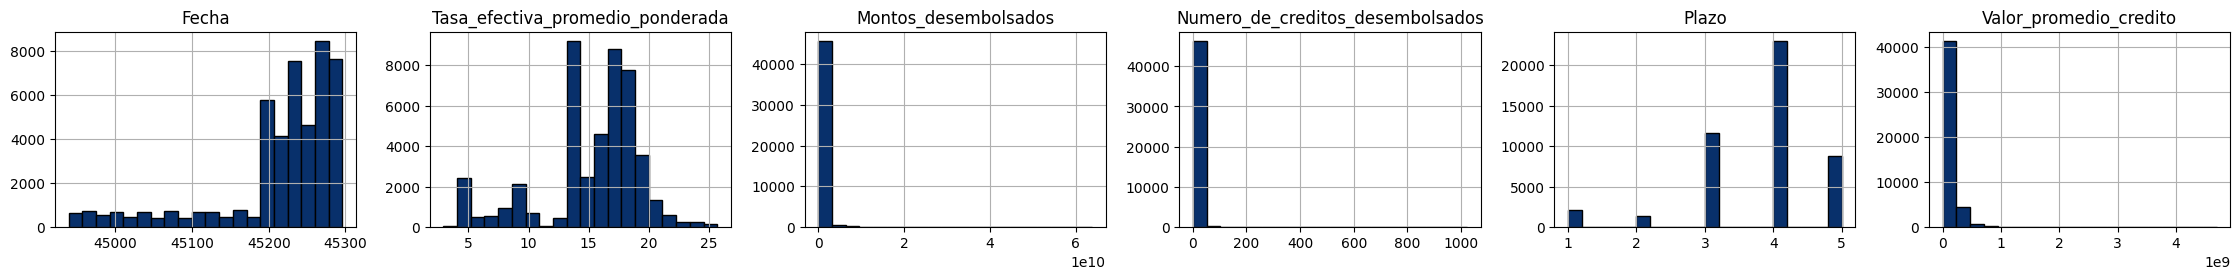

In [18]:
# Mostrar histogramas por variable
data.hist(figsize=(30, 5),
          bins=20,
          layout=(2, 8),
          color='#08306B',
          edgecolor='black')
plt.tight_layout()
plt.show()

## Tratamiento del conjunto de datos
Para una comprensión más profunda de la calidad y la variabilidad de los datos, se realiza el tratamiento de outliers y la visualización de la dispersión.

### Control de outliers

In [19]:
#Eliminación de datos atípicos
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = stats.zscore(data[column])

    return data[(np.abs(z_scores) < threshold)]

#df_cleaned = remove_outliers_zscore(data, 'Montos_desembolsados')
df_cleaned = remove_outliers_zscore(data, 'Tasa_efectiva_promedio_ponderada')
df_cleaned = remove_outliers_zscore(data, 'Numero_de_creditos_desembolsados')

In [20]:
#Mostrar estadísticos redondeados de las columnas sin datos atípicos
df_cleaned.describe().round(2)

,Fecha,Tasa_efectiva_promedio_ponderada,Montos_desembolsados,Numero_de_creditos_desembolsados,Plazo,Valor_promedio_credito
count,46215.00,46215.00,4.621500e+04,46215.00,46215.00,4.621500e+04
mean,45214.64,15.28,3.088461e+08,2.54,3.74,1.249456e+08
std,81.13,4.15,7.695517e+08,5.00,0.94,1.252930e+08
min,44939.00,2.91,1.000000e+05,1.00,1.00,1.000000e+05
25%,45198.00,14.00,6.997178e+07,1.00,3.00,5.915000e+07
50%,45233.00,16.50,1.200000e+08,1.00,4.00,9.264750e+07
75%,45268.00,18.02,2.450000e+08,2.00,4.00,1.497653e+08
max,45296.00,25.71,1.448556e+10,49.00,5.00,4.700000e+09


### Dispersión del dataset preparado

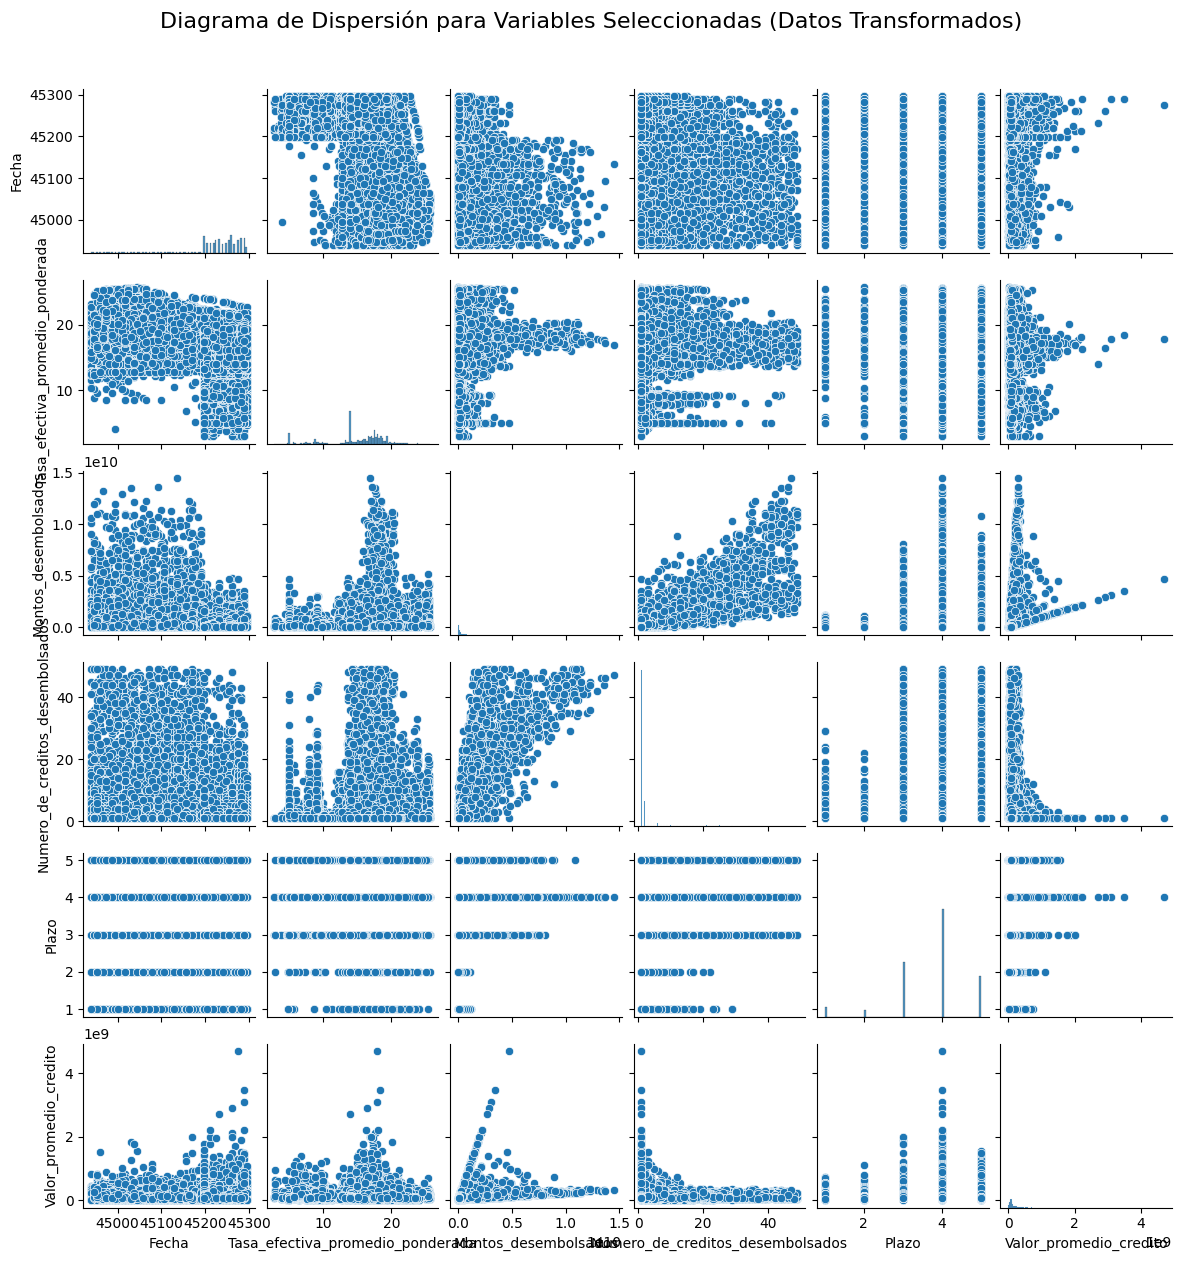

In [21]:
# Crear diagramas de dispersión datos transformados
sns.pairplot(df_cleaned, height=2)
plt.suptitle('Diagrama de Dispersión para Variables Seleccionadas (Datos Transformados)', size=16, y=1.05)
plt.show()

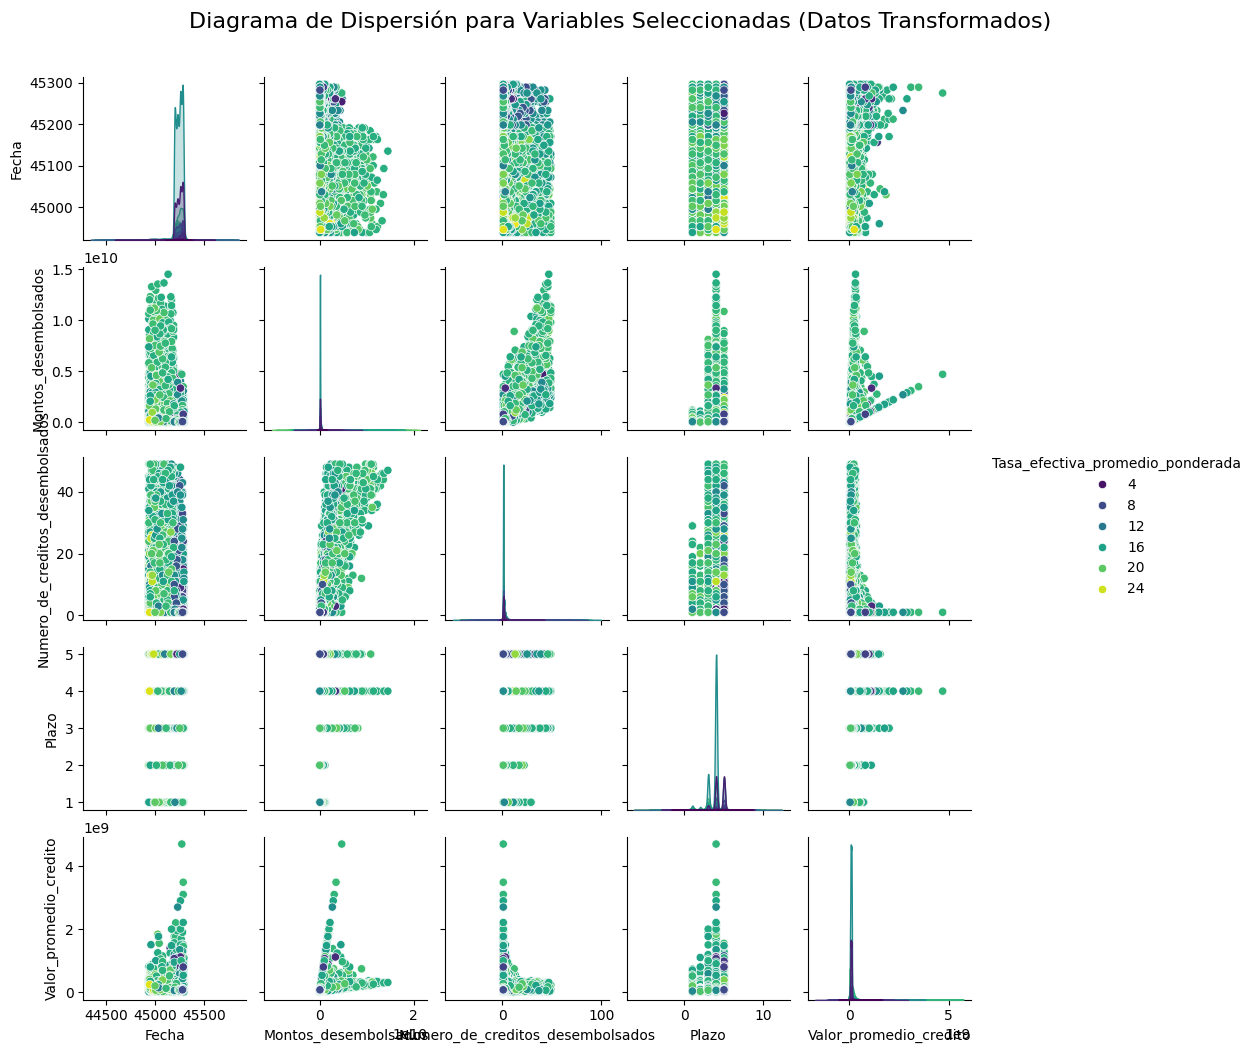

In [22]:
# Crear diagramas de dispersión datos transformados entorno a la tasa efectiva promedio ponderada
sns.pairplot(df_cleaned,
             palette = "viridis",
             hue = 'Tasa_efectiva_promedio_ponderada',
             height=2)
plt.suptitle('Diagrama de Dispersión para Variables Seleccionadas (Datos Transformados)', size=16, y=1.05)
plt.show()

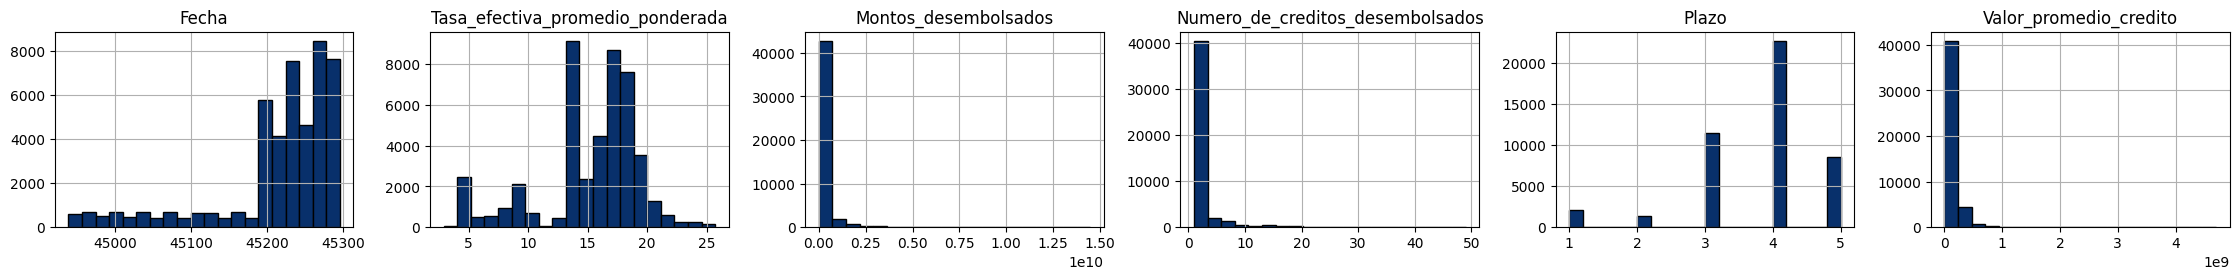

In [23]:
#Mostrar histogramas por variable datos transformados
df_cleaned.hist(figsize=(30, 5),
          bins=20,
          layout=(2, 8),
          color='#08306B',
          edgecolor='black')
plt.tight_layout()
plt.show()

### Correlación entre variables

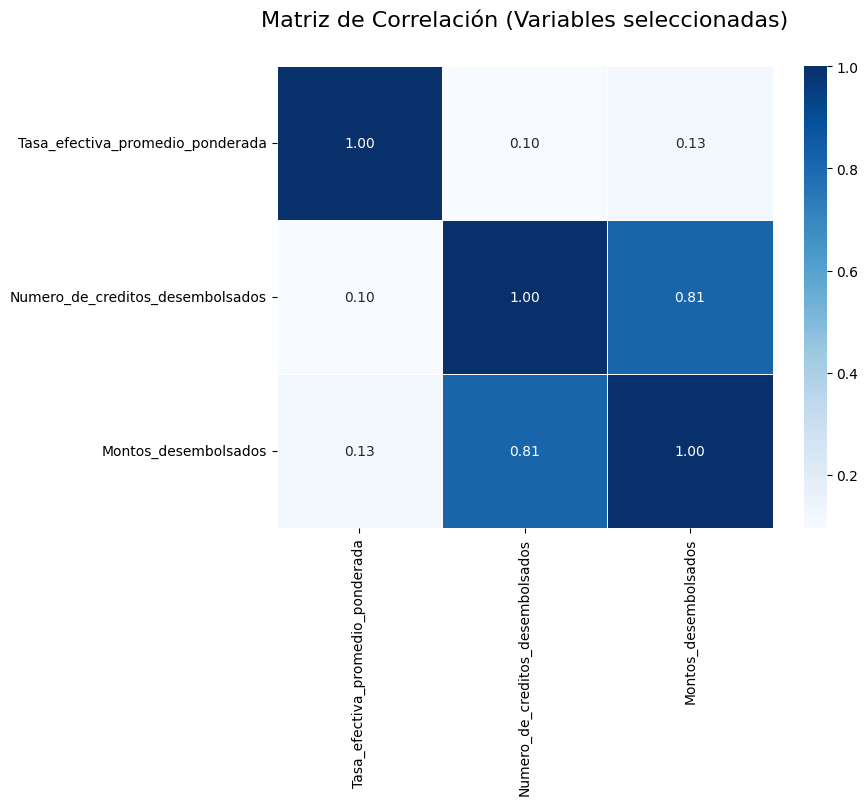

In [24]:
# Extraer las variables a analizar
df_selected = df_cleaned[['Tasa_efectiva_promedio_ponderada', 'Numero_de_creditos_desembolsados','Montos_desembolsados']]

# Matriz de correlación para las variables seleccionadas
correlation_matrix_selected = df_selected.corr()

# Crear un mapa de calor para las variables seleccionadas
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected,
            annot=True,
            cmap='Blues',
            fmt='.2f',
            linewidths=0.5)
plt.title('Matriz de Correlación (Variables seleccionadas)', size=16, y=1.07)
plt.show()

## Modelos de regresión
Se ejecutan diversos modelos de regresión como:

* Regresión lineal
* Regresión no lineal (cuadrática)
* Regresión logarítmica
* Regresión exponencial
* Regresión LTS



### Análisis de regresión lineal

Pendiente de la recta: 0.11534577981137613


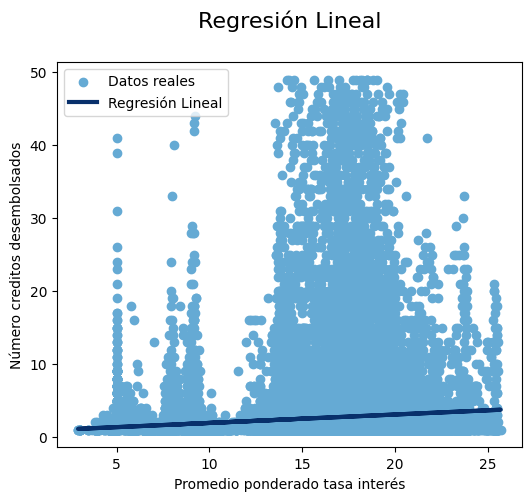

Métricas de evaluación:
Error absoluto medio: 2.3085299120629172
Error cuadrático medio: 24.763947369257696
Raíz cuadrada del error cuadrático medio: 4.976338751457511
Coeficiente de determinación (R^2): 0.009161993114045752


In [25]:
# Definición de variables
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[[variable_x]]
y = df_cleaned[variable_y]

# Modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo con las variables
modelo_regresion.fit(X, y)

# Determinar la predicción
predicciones = modelo_regresion.predict(X)

# Obtener la pendiente
pendiente = modelo_regresion.coef_[0]
print('Pendiente de la recta:', pendiente)

# Graficar los resultados
plt.figure(figsize=(6, 5))
plt.scatter(X.values, y.values, c='#65AAD4', label='Datos reales')
plt.plot(X.values, predicciones, color='#08306B', linewidth=3, label='Regresión Lineal')
plt.title('Regresión Lineal', size=16, y=1.07)
plt.xlabel("Promedio ponderado tasa interés")
plt.ylabel("Número creditos desembolsados")
plt.legend()
plt.show()

# Imprimir las métricas de evaluación del modelo
print('Métricas de evaluación:')
print('Error absoluto medio:', metrics.mean_absolute_error(y, predicciones))
print('Error cuadrático medio:', metrics.mean_squared_error(y, predicciones))
print('Raíz cuadrada del error cuadrático medio:', metrics.mean_squared_error(y, predicciones, squared=False))
print('Coeficiente de determinación (R^2):', metrics.r2_score(y, predicciones))

### Análisis de regresión no lineal (cuadrática)

Coeficientes (a, b, c): [ 0.00725361 -0.07654365  1.89117003]


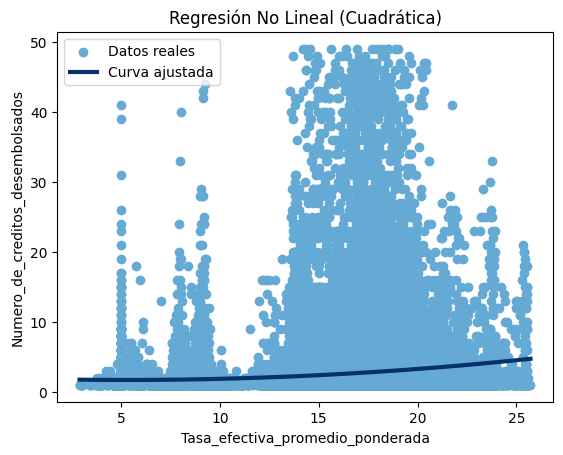

Error Absoluto Medio: 2.300334021283088
Error Cuadrático Medio: 24.738576005824754
Raíz del Error Cuadrático Medio: 4.973788898397755
R-cuadrado: 0.010177134634136498


In [26]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Definir la función cuadrática
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# Ajustar la curva a los datos de entrenamiento
popt1, pcov1 = curve_fit(quadratic_function, X, y)

print(f'Coeficientes (a, b, c): {popt1}')

# Realizar predicciones en el conjunto de prueba
predicciones = quadratic_function(X, *popt1)

# Crear una gráfica de dispersión con la curva ajustada
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, quadratic_function(x_range, *popt1), color='#08306B', linewidth=3, label='Curva ajustada')
plt.title('Regresión No Lineal (Cuadrática)')
plt.xlabel('Tasa_efectiva_promedio_ponderada')
plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()

# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

### Análisis de regresión logarítmica

Coeficientes (a, b): [ 1.20727459 -0.68793197]


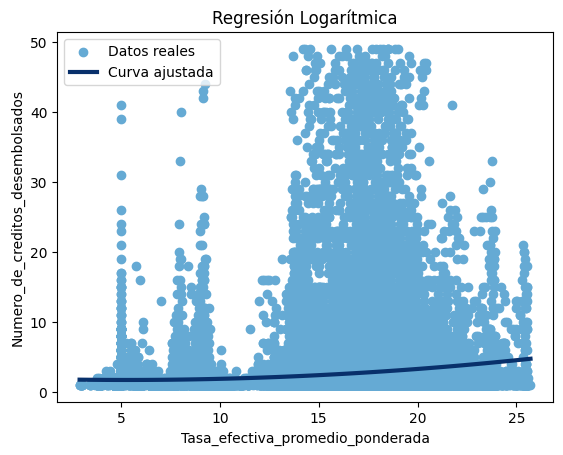

Error Absoluto Medio: 2.3121304801066866
Error Cuadrático Medio: 24.803999602304618
Raíz del Error Cuadrático Medio: 4.980361392740955
R-cuadrado: 0.007559450749866414


In [27]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Definir la función logarítmica
def logarithmic_function(x, a, b):
    return a * np.log(x) + b

# Ajustar la curva a los datos de entrenamiento
popt2, pcov2 = curve_fit(logarithmic_function, X, y)

print(f'Coeficientes (a, b): {popt2}')

# Realizar predicciones en el conjunto de prueba
predicciones = logarithmic_function(X, *popt2)

# Crear una gráfica de dispersión con la curva ajustada
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, quadratic_function(x_range, *popt1), color='#08306B', linewidth=3, label='Curva ajustada')
plt.title('Regresión Logarítmica')
plt.xlabel('Tasa_efectiva_promedio_ponderada')
plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()

# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

### Análisis de regresión exponencial



Coeficientes (a, b): [1.09535119 0.05347557]


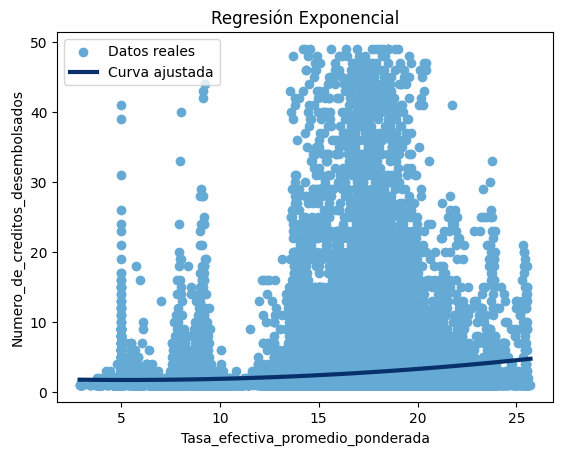

Error Absoluto Medio: 2.303501524787585
Error Cuadrático Medio: 24.74678186593051
Raíz del Error Cuadrático Medio: 4.974613740375278
R-cuadrado: 0.00984880741106764


In [28]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Definir la función exponencial
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Ajustar la curva a los datos de entrenamiento
popt, pcov = curve_fit(exponential_function, X, y)

print(f'Coeficientes (a, b): {popt}')

# Realizar predicciones en el conjunto de prueba
predicciones = exponential_function(X, *popt)

# Crear una gráfica de dispersión con la curva ajustada
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
x_range = np.linspace(X.min(), X.max(), 100)
plt.plot(x_range, quadratic_function(x_range, *popt1), color='#08306B', linewidth=3, label='Curva ajustada')
plt.title('Regresión Exponencial')
plt.xlabel('Tasa_efectiva_promedio_ponderada')
plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()

# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

### Análisis de regresión LTS

                           Robust linear Model Regression Results                           
Dep. Variable:     Numero_de_creditos_desembolsados   No. Observations:                46215
Model:                                          RLM   Df Residuals:                    46214
Method:                                        IRLS   Df Model:                            0
Norm:                                   TrimmedMean                                         
Scale Est.:                                     mad                                         
Cov Type:                                        H1                                         
Date:                              Fri, 19 Jan 2024                                         
Time:                                      01:28:48                                         
No. Iterations:                                  21                                         
                                       coef    std err          z     

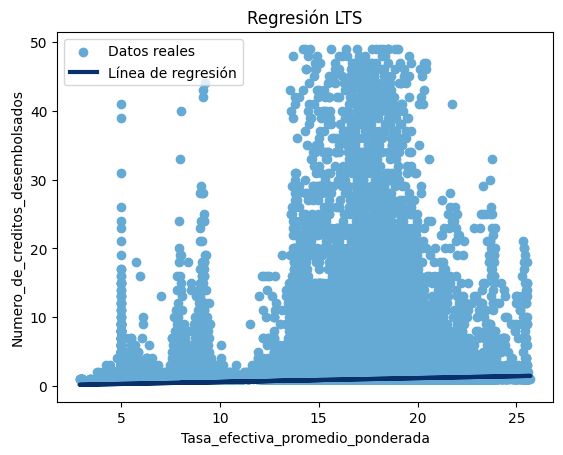

Error Absoluto Medio: 1.7032649007964626
Error Cuadrático Medio: 27.6154094389738
Raíz del Error Cuadrático Medio: 5.255036578271725
R-cuadrado: -0.10492874338040403


In [29]:
variable_x = 'Tasa_efectiva_promedio_ponderada'
variable_y = 'Numero_de_creditos_desembolsados'
X = df_cleaned[variable_x]
y = df_cleaned[variable_y]

# Utilizaremos la función rlm (Robust Linear Model) de statsmodels con el método 'least trimmed squares'
model_lts = sm.RLM(y, X, M=sm.robust.norms.TrimmedMean(0.5))
result = model_lts.fit()

print(result.summary())

# Realizar predicciones en el conjunto de prueba
predicciones = result.predict(X)

# Crear una gráfica de dispersión con la línea de regresión
plt.scatter(X, y, c='#65AAD4', label='Datos reales')
plt.plot(X, predicciones, color='#08306B', linewidth=3, label='Línea de regresión')
plt.title('Regresión LTS')
plt.xlabel('Tasa_efectiva_promedio_ponderada')
plt.ylabel('Numero_de_creditos_desembolsados')
plt.legend()
plt.show()

# Calcular métricas de evaluación del modelo
rf_mse = mean_squared_error(y, predicciones)
rf_r2 = r2_score(y, predicciones)
rf_mae = mean_absolute_error(y, predicciones)
rf_rmse = np.sqrt(rf_mse)

# Imprimir las métricas de evaluación del modelo
print(f'Error Absoluto Medio: {rf_mae}')
print(f'Error Cuadrático Medio: {rf_mse}')
print(f'Raíz del Error Cuadrático Medio: {rf_rmse}')
print(f'R-cuadrado: {rf_r2}')

# Referencias

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Morales Daniel. DataSurce.ai. 2020. _Una Guía Paso A Paso Para Crear Visualizaciones Avanzadas de Datos de Python Con Seaborn / Matplotlib_. [URL](https://www.datasource.ai/es/data-science-articles/una-guia-paso-a-paso-para-crear-visualizaciones-avanzadas-de-datos-de-python-con-seaborn-matplotlib)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>CodeToDevs. _Cómo crear un mapa de calor de correlaciones de datos en Python (corrcoef y heatmap)_ [URL](https://www.codetodevs.com/como-crear-mapa-calor-correlaciones-python-corrcoef-heatmap/)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Scikit-learn developers._3.3. Métricas y puntuación: cuantificar la calidad de las predicciones_. [URL](https://qu4nt.github.io/sklearn-doc-es/modules/model_evaluation.html)
